In [2]:
import pandas as pd

# Load the Excel file to check its structure and contents
file_path = r"C:\Users\dell\OneDrive\Desktop\Training Data Dump.xlsx"
data = pd.ExcelFile(file_path)

# Display sheet names to understand the file's structure
data.sheet_names


['Dump']

In [3]:
# Load the main sheet containing the data
df = data.parse('Dump')

# Display the first few rows of the dataset to understand its structure
df.head()


,Lead_ID,F2,F3,F4,F5,F7,F8,F9,F10,F11,...,F108,F109,F110,F111,F112,F113,F114,F115,F117,Label
0,197056838,NaT,2024-09-22 08:05:00,NaN,1.0,25517.0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,12261,NaN,0,0
1,197056839,NaT,2024-09-22 08:05:00,NaN,2.0,25517.0,1,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,11852,NaN,0,0
2,197057485,NaT,2024-09-22 08:13:00,NaN,3.0,25511.0,1,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,16942,NaN,0,0
3,197058117,NaT,2024-09-22 08:17:00,NaN,2.0,25517.0,1,2,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,16248,NaN,0,0
4,197058480,NaT,2024-09-22 08:23:00,NaN,4.0,25517.0,1,2,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,10508,NaN,0,0


In [4]:
# Check the data types of the columns to identify timestamp and other formats
df.info()

# Display summary of missing values
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_summary[missing_summary > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 115 entries, Lead_ID to Label
dtypes: datetime64[ns](2), float64(74), int64(39)
memory usage: 8.8 MB


F67     9995
F110    9982
F113    9982
F111    9982
F112    9982
        ... 
F41        6
F34        5
F31        3
F33        3
F32        2
Length: 65, dtype: int64

In [19]:
# Drop columns with more than 90% missing values
threshold = 0.9 * len(df)
columns_to_drop = missing_summary[missing_summary > threshold].index
df_cleaned = df.drop(columns=columns_to_drop)

# Extract features from timestamp columns
timestamp_cols = df_cleaned.select_dtypes(include=['datetime64']).columns
for col in timestamp_cols:
    df_cleaned[f'{col}_year'] = df_cleaned[col].dt.year
    df_cleaned[f'{col}_month'] = df_cleaned[col].dt.month
    df_cleaned[f'{col}_day'] = df_cleaned[col].dt.day
    df_cleaned[f'{col}_hour'] = df_cleaned[col].dt.hour
    
df_cleaned = df_cleaned.drop(columns=timestamp_cols) # Drop original timestamp columns

df_cleaned.info()

df_cleaned.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 92 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lead_ID   10000 non-null  int64  
 1   F4        1166 non-null   float64
 2   F5        8723 non-null   float64
 3   F7        9834 non-null   float64
 4   F8        10000 non-null  int64  
 5   F9        10000 non-null  int64  
 6   F10       10000 non-null  int64  
 7   F11       10000 non-null  int64  
 8   F12       10000 non-null  float64
 9   F13       10000 non-null  float64
 10  F15       10000 non-null  int64  
 11  F18       9027 non-null   float64
 12  F19       6819 non-null   float64
 13  F20       5851 non-null   float64
 14  F22       2610 non-null   float64
 15  F23       10000 non-null  int64  
 16  F24       10000 non-null  int64  
 17  F25       10000 non-null  float64
 18  F26       10000 non-null  int64  
 19  F27       5234 non-null   float64
 20  F28       10000 non-null  flo

,Lead_ID,F4,F5,F7,F8,F9,F10,F11,F12,F13,...,F117,Label,F2_year,F2_month,F2_day,F2_hour,F3_year,F3_month,F3_day,F3_hour
0,197056838,NaN,1.0,25517.0,1,1,0,0,0.0,0.0,...,0,0,NaN,NaN,NaN,NaN,2024,9,22,8
1,197056839,NaN,2.0,25517.0,1,2,1,0,0.0,0.0,...,0,0,NaN,NaN,NaN,NaN,2024,9,22,8
2,197057485,NaN,3.0,25511.0,1,2,2,0,0.0,0.0,...,0,0,NaN,NaN,NaN,NaN,2024,9,22,8
3,197058117,NaN,2.0,25517.0,1,2,3,0,0.0,0.0,...,0,0,NaN,NaN,NaN,NaN,2024,9,22,8
4,197058480,NaN,4.0,25517.0,1,2,4,0,0.0,0.0,...,0,0,NaN,NaN,NaN,NaN,2024,9,22,8
5,197058481,NaN,5.0,25517.0,2,4,5,0,0.0,0.0,...,0,0,NaN,NaN,NaN,NaN,2024,9,22,8
6,197058663,NaN,6.0,25516.0,2,1,6,0,0.0,0.0,...,0,0,NaN,NaN,NaN,NaN,2024,9,22,8
7,197058664,NaN,6.0,25512.0,1,3,7,0,0.0,0.0,...,0,0,NaN,NaN,NaN,NaN,2024,9,22,8
8,197058862,NaN,5.0,25517.0,2,2,8,0,0.0,0.0,...,0,0,NaN,NaN,NaN,NaN,2024,9,22,8
9,197058874,NaN,6.0,25517.0,2,3,9,0,0.0,0.0,...,0,0,NaN,NaN,NaN,NaN,2024,9,22,8


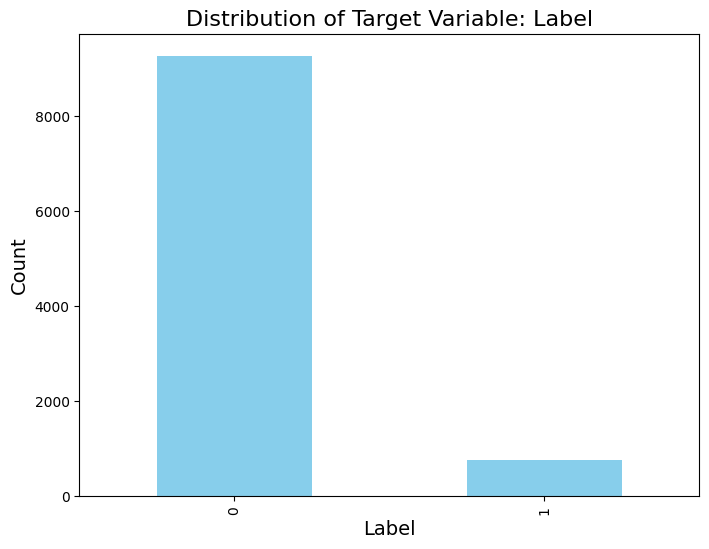

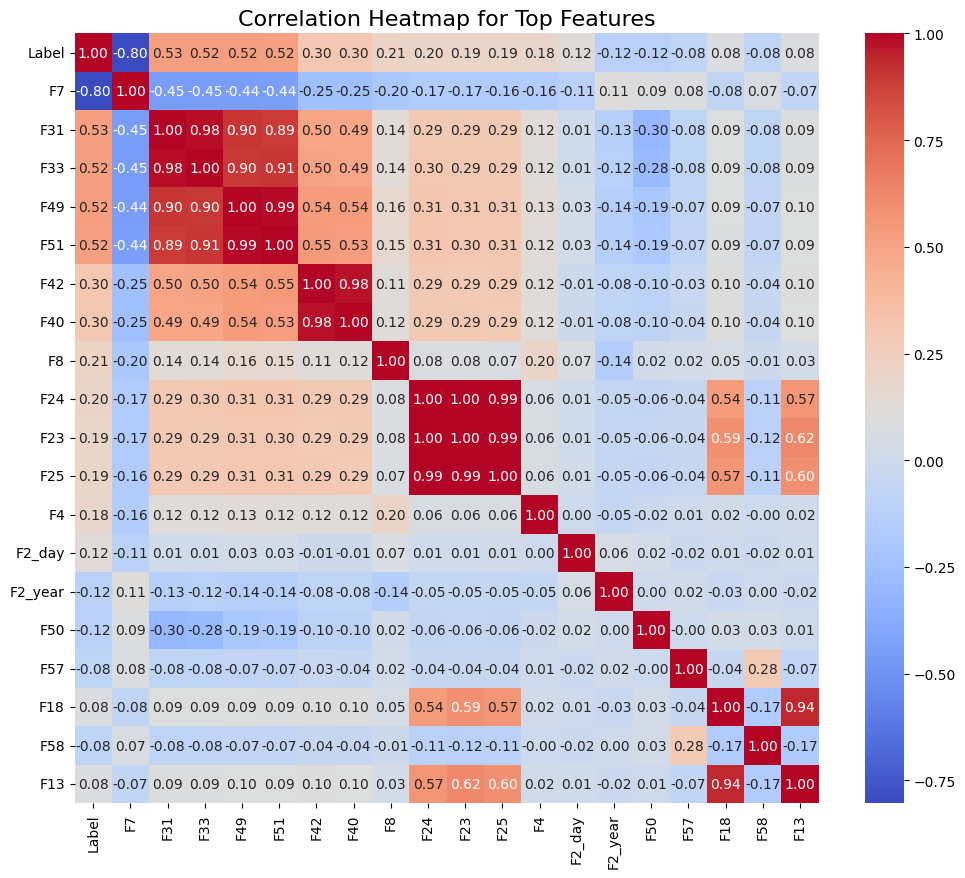

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Impute missing values: Using median for numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())

# Visualize the distribution of the target variable 'Label'
plt.figure(figsize=(8, 6))
df_cleaned['Label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Target Variable: Label', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Correlation heatmap for top 20 features most correlated with the target variable
correlation = df_cleaned.corr()
top_features = correlation['Label'].abs().sort_values(ascending=False).head(20).index

plt.figure(figsize=(12, 10))
plt.title('Correlation Heatmap for Top Features', fontsize=16)
sns.heatmap(df_cleaned[top_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Separate features and target variable
X = df_cleaned.drop(columns=['Label', 'Lead_ID'])
y = df_cleaned['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a baseline model: Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix


(0.998,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1851\n           1       0.99      0.99      0.99       149\n\n    accuracy                           1.00      2000\n   macro avg       0.99      0.99      0.99      2000\nweighted avg       1.00      1.00      1.00      2000\n',
 array([[1849,    2],
        [   2,  147]], dtype=int64))

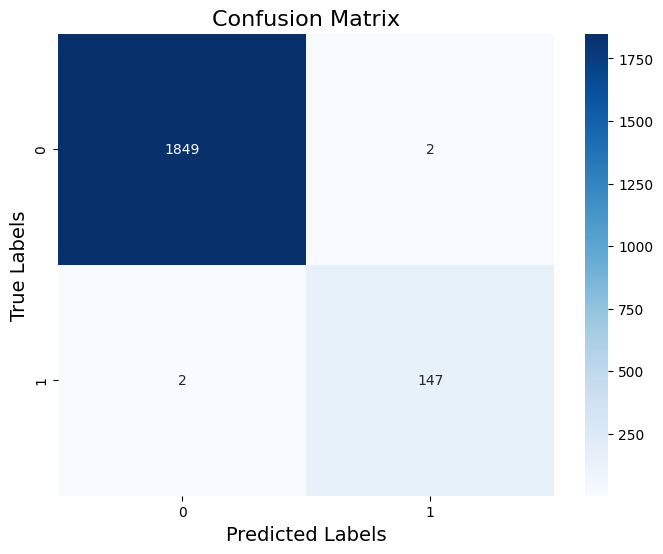

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title, fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.show()

# Plotting the confusion matrix
plot_confusion_matrix(conf_matrix, classes=[0, 1])


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score

models_params = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'SVC': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

# Perform GridSearchCV for each model
results = []
for model_name, config in models_params.items():
    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=make_scorer(f1_score, average='macro'),
        cv=3,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    
    results.append({
        'Model': model_name,
        'Best Params': grid.best_params_,
        'Best Score': grid.best_score_
    })

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)

# Print results
print(results_df)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
              Model                                        Best Params  \
0      RandomForest  {'max_depth': 20, 'min_samples_split': 5, 'n_e...   
1  GradientBoosting  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
2               SVC                          {'C': 1, 'kernel': 'rbf'}   

   Best Score  
0    0.993601  
1    0.999546  
2    0.920238  


In [14]:
import random

# Select a random sample from the test set
random_index = random.randint(0, X_test.shape[0] - 1)
random_sample = X_test.iloc[random_index]
random_true_label = y_test.iloc[random_index]

# Predict the label for the random sample
predicted_label = model.predict([random_sample])[0]

# Display the results
print("Random Sample Prediction vs Actual:")
print(f"Random Sample Index: {random_index}")
print(f"Features: {random_sample.to_dict()}")
print(f"True Label: {random_true_label}")
print(f"Predicted Label: {predicted_label}")

# Compare the result
R'/f predicted_label == random_true_label:
    print("\nPrediction is CORRECT!")
else:
    print("\nPrediction is INCORRECT.")


Random Sample Prediction vs Actual:
Random Sample Index: 1801
Features: {'F4': 1.0, 'F5': 2.0, 'F7': 981.0, 'F8': 3.0, 'F9': 5.0, 'F10': 3214.0, 'F11': 0.0, 'F12': 0.0, 'F13': 0.0, 'F15': 0.0, 'F18': 4.0, 'F19': 4.0, 'F20': 1.0, 'F22': 1.0, 'F23': 660.0, 'F24': 437.0, 'F25': 2.6, 'F26': 0.0, 'F27': 30.0, 'F28': 63.65788789165, 'F29': 67.0146180192243, 'F30': 0.0, 'F31': 180.0, 'F32': 4.0, 'F33': 0.78, 'F34': 0.0, 'F35': 0.0, 'F36': 30.0, 'F37': 65.6364944826483, 'F38': 69.2989524576954, 'F39': 2.0, 'F40': 0.0, 'F41': 1.0, 'F42': 0.0, 'F43': 0.0, 'F44': 0.0, 'F45': 30.0, 'F46': 55.7434615276568, 'F47': 57.8772802653399, 'F48': 3.0, 'F49': 180.0, 'F50': 4.0, 'F51': 0.78, 'F52': 0.0, 'F53': 0.0, 'F54': 30.0, 'F55': 2.0, 'F56': 1.0, 'F57': 0.2, 'F58': 6.11083333333333, 'F68': 0.0, 'F69': 9.0, 'F70': 10.0, 'F71': 0.0, 'F72': 4.0, 'F73': 10.0, 'F78': 5.0, 'F79': 12.0, 'F80': 7.0, 'F81': 5.0, 'F82': 12.0, 'F83': 7.0, 'F84': 1.0, 'F85': 5.0, 'F86': 10.0, 'F91': 1.0, 'F92': 5.0, 'F93': 10.0, 'F

C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
import random

# Select a random sample from the test set
random_index = random.randint(0, X_test.shape[0] - 1)
random_sample = X_test.iloc[random_index]
random_true_label = y_test.iloc[random_index]

# Predict the label for the random sample
predicted_label = model.predict([random_sample])[0]

# Display the results
print("Random Sample Prediction vs Actual:")
print(f"Random Sample Index: {random_index}")
print(f"Features: {random_sample.to_dict()}")
print(f"True Label: {random_true_label}")
print(f"Predicted Label: {predicted_label}")

# Compare the result
if predicted_label == random_true_label:
    print("\nPrediction is CORRECT!")
else:
    print("\nPrediction is INCORRECT.")


Random Sample Prediction vs Actual:
Random Sample Index: 1599
Features: {'F4': 1.0, 'F5': 152.0, 'F7': 25512.0, 'F8': 1.0, 'F9': 3.0, 'F10': 1467.0, 'F11': 0.0, 'F12': 0.0, 'F13': 0.0, 'F15': 0.0, 'F18': 2.0, 'F19': 2.0, 'F20': 1.0, 'F22': 1.0, 'F23': 210.0, 'F24': 116.0, 'F25': 0.78, 'F26': 0.0, 'F27': 30.0, 'F28': 49.8817966903073, 'F29': 0.0, 'F30': 0.0, 'F31': 0.0, 'F32': 1.0, 'F33': 0.0, 'F34': 0.0, 'F35': 0.0, 'F36': 30.0, 'F37': 49.8817966903073, 'F38': 0.0, 'F39': 2.0, 'F40': 120.0, 'F41': 7.0, 'F42': 0.52, 'F43': 0.0, 'F44': 0.0, 'F45': 30.0, 'F46': 49.8817966903073, 'F47': 0.0, 'F48': 2.0, 'F49': 90.0, 'F50': 7.0, 'F51': 0.26, 'F52': 0.0, 'F53': 0.0, 'F54': 30.0, 'F55': 2.0, 'F56': 0.0, 'F57': 0.0, 'F58': 4.51833333333333, 'F68': 0.0, 'F69': 10.0, 'F70': 9.0, 'F71': 0.0, 'F72': 5.0, 'F73': 9.0, 'F78': 2.0, 'F79': 6.0, 'F80': 1.0, 'F81': 2.0, 'F82': 6.0, 'F83': 1.0, 'F84': 0.0, 'F85': 14.0, 'F86': 9.0, 'F91': 0.0, 'F92': 12.0, 'F93': 9.0, 'F94': 2.0, 'F95': 6.0, 'F96': 1.0, 'F

C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
# Predict probabilities for the test set
probabilities = model.predict_proba(X_test)

# Extract probabilities for Label=1 (conversion)
conversion_probabilities = probabilities[:, 1]

# Add these probabilities to the test set for analysis
X_test_with_prob = X_test.copy()
X_test_with_prob['Conversion_Probability'] = conversion_probabilities
X_test_with_prob['True_Label'] = y_test.reset_index(drop=True)

# Sort by the probability of conversion (descending)
sorted_test = X_test_with_prob.sort_values(by='Conversion_Probability', ascending=False)

# Display the top predictions with the highest conversion probabilities
top_conversions = sorted_test.head(10)
print("Top 10 Samples with Highest Conversion Probabilities:")
print(top_conversions)

# Summarize total predicted conversions
predicted_conversions = sum(conversion_probabilities > 0.5)
print(f"\nTotal Predicted Conversions (Label=1): {predicted_conversions}")


Top 10 Samples with Highest Conversion Probabilities:
       F4     F5     F7  F8  F9   F10  F11  F12  F13  F15  ...  F2_year  \
9997  1.0    2.0  981.0   3   2  2965    0  0.0  0.0    0  ...   1996.0   
5234  1.0    5.0  981.0   3   2  5234    0  0.0  0.0    0  ...   1999.0   
9689  1.0   48.0  981.0   3   2  2657    0  0.0  0.0    0  ...   1999.0   
3411  1.0    2.0  981.0   3   1  3411    0  0.0  0.0    0  ...   1984.0   
2361  1.0    2.0  981.0   3   2  2361    0  0.0  0.0    0  ...   1979.0   
8560  1.0    6.0  981.0   3   3  1528    0  0.0  0.0    0  ...   2000.0   
8914  1.0  179.0  981.0   3   1  1882    0  0.0  0.0    0  ...   1989.0   
7764  1.0  112.0  981.0   3   1   732    0  0.0  0.0    0  ...   1986.0   
9976  1.0    6.0  981.0   3   2  2944    0  0.0  0.0    0  ...   1987.0   
2105  1.0    2.0  981.0   3   4  2105    0  0.0  0.0    0  ...   1985.0   

      F2_month  F2_day  F2_hour  F3_year  F3_month  F3_day  F3_hour  \
9997       4.0     4.0      0.0     2024        1